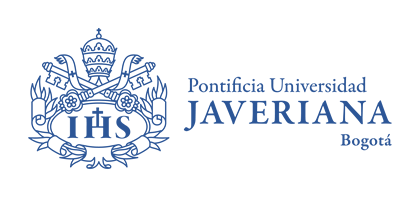

# Análisis de algoritmos - Ejemplo análisis regresión
## Uso de statsmodels para análisis de resultados
Este notebook tiene como objetivo familiarizar al estudiante con el uso del paquete statsmodels de Python para el análisis de resultados experimentales


In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

# Carga de los archivos

Mediante el uso de la librería pandas, podemos cargar un archivo en formato 'csv' que generamos mediante nuestros experimentos.

In [2]:
df_results = pd.read_csv("tiempos.txt", sep=',', header=None, names=['n','iterative','recursive'])

In [3]:
df_results.head()

,n,iterative,recursive
0,100,1492100,6156900
1,300,23071000,69438500
2,500,38714200,184953300
3,700,103995100,408005100
4,900,136898600,552500800


 Con la función plot, podemos revisar el comportamiento del tiempo de ejecución a medida que incrementamos el tamaño de la entrada

<Axes: xlabel='n'>

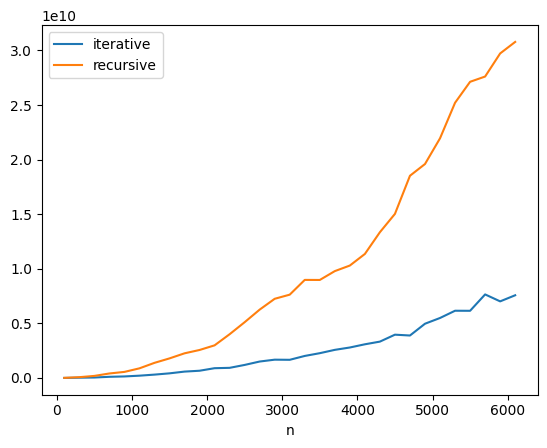

In [4]:
df_results.plot(y=['iterative','recursive'],x='n')

# statsmodels API

Statsmodels es un paquete de estadística de Python que nos permite realizar de forma sencilla regresiones y confirmar si nuestra hipótesis teórica sobre el comportamiento de un algoritmo coincide con lo que estamos observando experimentalmente.

La función [`ols`](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html) realiza una regresión de mínimos cuadrados para ver si nuestra variable dependiente (n) se relaciona con la variable independiente (tiempo).

En nuestro DataFrame quedó registrado el tiempo del algoritmo `bubblesort` en la columna `bubble` del algoritmo. Nuestra hipótesis teórica es que este algoritmo es cuadrático, para realizar la confirmación de esta hipótesis vamos a relacionar ambas variables con la siguiente fórmula:

`bubble ~ np.power(n,2)`

Nota: Para ver la sintaxis de cómo se pueden expresar estas fórmulas, puede conocer más en el siguiente link:

https://www.statsmodels.org/devel/example_formulas.html


In [ ]:
# ver https://www.statsmodels.org/devel/example_formulas.html

In [5]:
mod = smf.ols(formula='iterative ~ np.power(n,2)', data=df_results)

In [6]:
res = mod.fit()

In [7]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              iterative   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     2378.
Date:                Mon, 10 Mar 2025   Prob (F-statistic):           2.21e-29
Time:                        02:24:00   Log-Likelihood:                -645.19
No. Observations:                  31   AIC:                             1294.
Df Residuals:                      29   BIC:                             1297.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.241e+08   7.37e+07     -1.

Los parámetros nos indican la relación encontrada entre las variables

In [8]:
res.params


,0
Intercept,-1.241013e+08
"np.power(n, 2)",2.091920e+02


El plot_fit nos indica qué tanto ajuste logró la regresión vs los valores reales. Diferencias importantes para n pequeños o n grandes nos indicarían que no se está ajustando de forma correcta a la hipótesis.

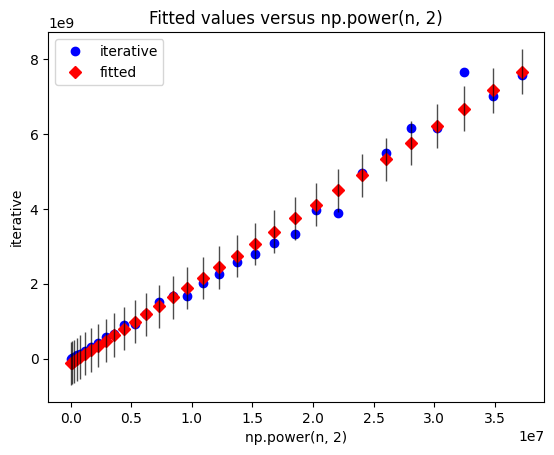

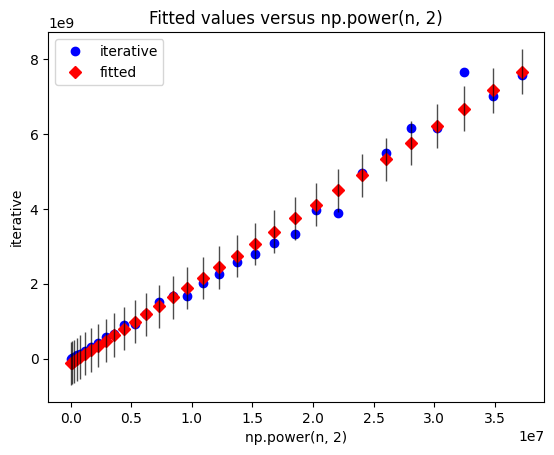

In [9]:
sm.graphics.plot_fit(res,"np.power(n, 2)")

El siguiente código prueba el resultado de la hipótesis de la complejidad teórica del quicksort vs lo obtenido.

In [17]:
mod = smf.ols(formula='recursive ~ np.power(n,2)', data=df_results)

In [18]:
res = mod.fit()

In [19]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              recursive   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     2820.
Date:                Mon, 10 Mar 2025   Prob (F-statistic):           1.91e-30
Time:                        02:37:57   Log-Likelihood:                -685.92
No. Observations:                  31   AIC:                             1376.
Df Residuals:                      29   BIC:                             1379.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -4.844e+08   2.74e+08     -1.

In [13]:
res.params

,0
Intercept,-4.843545e+08
"np.power(n, 2)",8.476530e+02


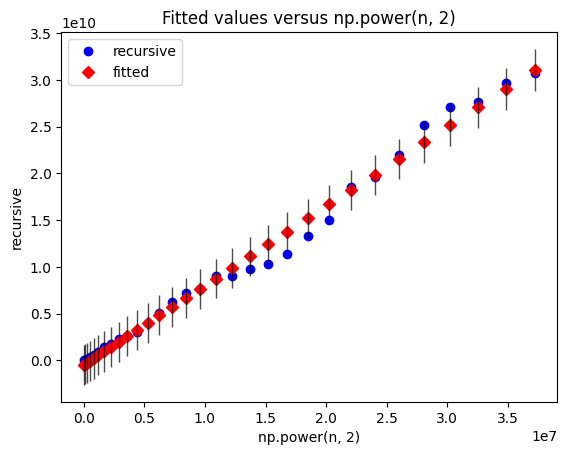

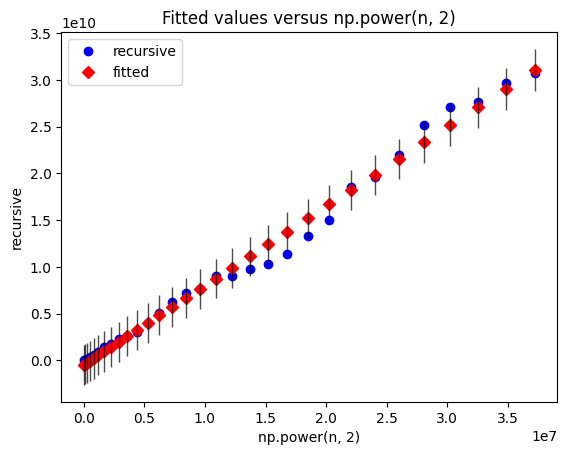

In [20]:
sm.graphics.plot_fit(res,"np.power(n, 2)")